In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [88]:
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")

In [90]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [92]:
df = df[["date","meantemp"]]

In [93]:
def helper(val):
    if "2016-01-01"<=val<="2016-05-01":
        return val
    else:
        return 

In [94]:
df["date"] = df["date"].apply(helper)

In [95]:
df= df.dropna()

In [96]:
df["date"] = pd.to_datetime(df["date"])

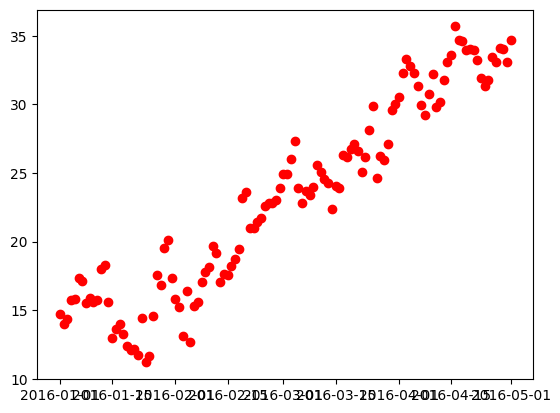

In [97]:
plt.scatter(x= df["date"],y=df["meantemp"],color="red")

In [120]:
x1 = df["meantemp"].ewm(alpha=0.9).mean()

In [121]:
x1

1095    14.714286
1096    14.064935
1097    14.344273
1098    15.609554
1099    15.810957
          ...    
1212    33.139012
1213    34.052363
1214    34.069522
1215    33.163202
1216    34.535070
Name: meantemp, Length: 122, dtype: float64

In [122]:
df["ewma"] = x1
df

,date,meantemp,ewma
1095,2016-01-01,14.714286,14.714286
1096,2016-01-02,14.000000,14.064935
1097,2016-01-03,14.375000,14.344273
1098,2016-01-04,15.750000,15.609554
1099,2016-01-05,15.833333,15.810957
...,...,...,...
1212,2016-04-27,33.125000,33.139012
1213,2016-04-28,34.153846,34.052363
1214,2016-04-29,34.071429,34.069522
1215,2016-04-30,33.062500,33.163202


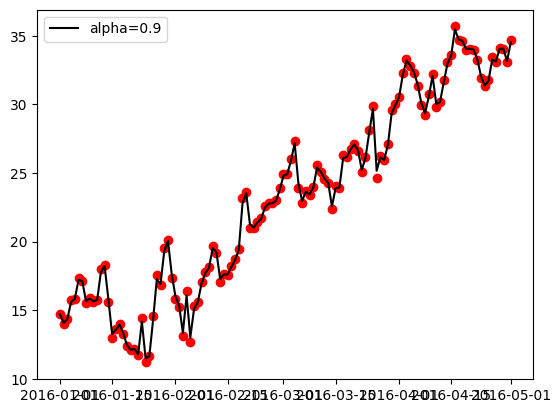

In [123]:
plt.scatter(x=df["date"],y=df["meantemp"],color="red")
plt.plot(df["date"],x1,color="black",label="alpha=0.9")
plt.legend()
plt.show()